# 1. Introduction and Motivation:
Linear regression is one of the foundational algorithms in machine learning and statistics. It aims to model the relationship between a dependent variable and one or more independent variables. The primary goal is to find the best fit straight line that accurately predict the output values within a range. In this notebook, we'll demonstrate the use of a custom-built linear regression model on the Boston Housing dataset, predicting house prices based on various features.

# 2. Imports:

In [10]:
# Necessary imports
import os
# Change directory to the root of the project
os.chdir('..')  # This moves one directory up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from models.regression.LinearRegression import LinearRegression

# 3. Load Dataset:

In [11]:
# Load the Boston Housing dataset
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['PRICE'] = boston_data.target

/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

# 4. Data Exploration:

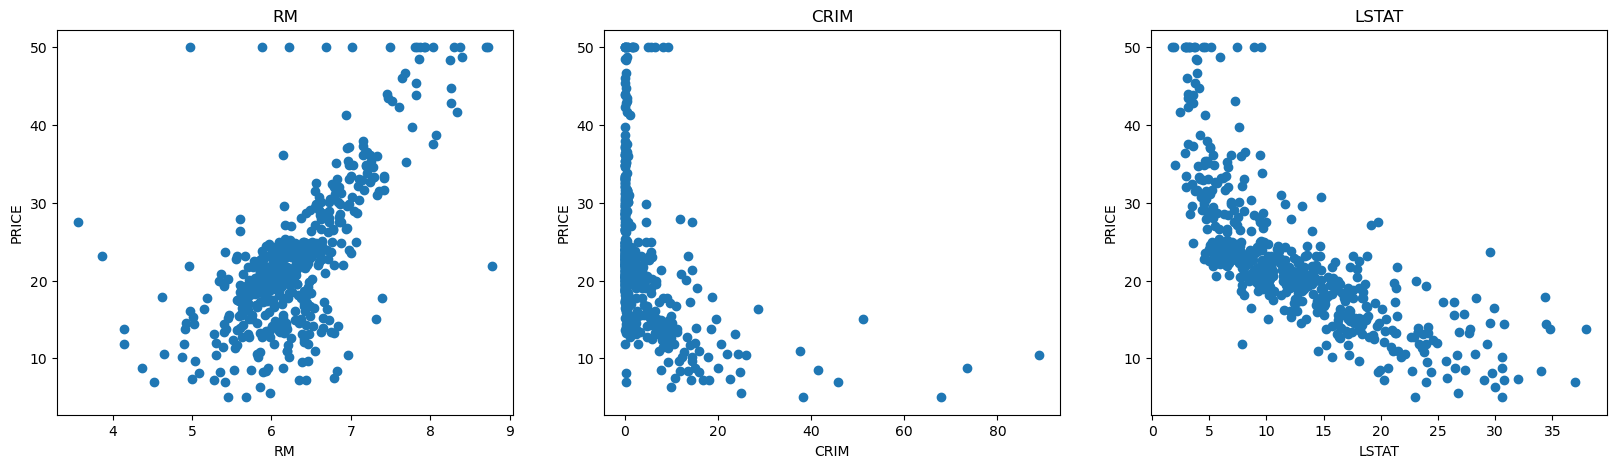

In [12]:
# Display the first few rows of the dataset
df.head()

# Provide basic statistics about the dataset
df.describe()

# Visualization: Plotting some features against the PRICE to see their linear relationship
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM', 'LSTAT']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(df[col], target)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

# 5. Model Demonstration:

In [13]:
# Splitting the dataset into training and test sets
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the LinearRegression class
model = LinearRegression()

# Train the model using the training data
model.fit(X_train.values, y_train.values)

# Make predictions on the test data
y_pred = model.predict(X_test.values)

# Evaluate the model's performance
r2 = model.score(X_test.values, y_test.values)
metrics = model.metrics(X_test.values, y_test.values)

print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
print(f"Mean Squared Error (MSE): {metrics['MSE']}")
print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")

R^2 Score: 0.7393080382293654
Mean Absolute Error (MAE): 3.404898044056566
Mean Squared Error (MSE): 20.41058222714806
Root Mean Squared Error (RMSE): 4.517807236608049


# 6. Results Interpretation:

## 1. $R^2$ Score (Coefficient of Determination):
- Value: 0.7393 (or $73.93 \%$ )
- Interpretation: This metric provides an indication of how well the independent variables explain the variability in the dependent variable (house prices in this case). An $R^2$ value of 0.7393 means that approximately $73.93 \%$ of the variability in house prices can be explained by the model. This is a reasonably good score, especially for a simple linear regression model.

## 2. Mean Absolute Error (MAE):
- Value: 3.4049
- Interpretation: On average, the predicted house prices are about \$3,404.90 off from the actual prices. This gives an idea of the absolute errors of the predictions.

## 3. Mean Squared Error (MSE):
- Value: 20.4106
- Interpretation: MSE gives an idea of how close the predicted values are to the actual values. The lower the MSE, the better. It penalizes larger errors more severely than smaller ones (because it squares the errors).

## 4. Root Mean Squared Error (RMSE):
- Value: 4.5178
- Interpretation: RMSE is the square root of MSE. It provides an indication of the average magnitude of prediction errors. In this context, the predicted house prices are, on average, about $\$ 4,517.81$ off from the actual prices. It's a commonly used metric because its units are the same as the dependent variable, making it easier to interpret.

# Conclusion:
The model seems to be performing reasonably well given that it's a simple linear regression model without any advanced features or optimizations. An $R^2$ value of $73.93 \%$ for such a model is commendable. The MAE and RMSE values give a sense of the average errors the model makes in its predictions. These values can be used as benchmarks if we decide to implement and test more advanced regression models or techniques in the future.